In [109]:
import pandas
from os import path
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from os import path
from PIL import Image
import random
import matplotlib
import numpy as np

def create_word_cloud(text, mask, color):

	word_cloud = WordCloud(background_color=color,relative_scaling = 0, 
	                       max_words=1000, mask= mask, margin = 4
	                      ).generate(text)
	return word_cloud

def remove_words(text, word_list):
    for word in word_list:
        text = text.replace(word, " ")
    return text
        
def plot_word_cloud(word_cloud):
	plt.imshow(word_cloud, cmap=plt.cm.gray)
	plt.axis("off")
	plt.show()
	plt.figure(figsize= (100,250))
    
def show_and_save_cloud(text, mask, color, output_file_name):
    word_cloud = create_word_cloud(text, mask, color)
    word_cloud.to_file(output_file_name)
    return word_cloud

#absolute path for directory with images and texts
base_path = ''

#create masks
trump_shadow_mask = np.array(Image.open(base_path + "trump_shadow.jpg"))
greed_mask = np.array(Image.open(base_path + "greed.png"))
gun_mask = np.array(Image.open(base_path + "gun.jpg"))

#load texts
tweet_text = open(base_path + 'trump_tweets_just_text_crowdbabble.csv').read().upper()
nra_speech_text = open(base_path + 'trump_nra_speech.txt').read().upper()
nomination_speech_text = open(base_path + 'trump_nomination_speech.txt').read().upper()


#clean irrelevant words
remove_word_list = [ "AMP", "HTTPS", ".CO/","HTTP"]
tweet_text = remove_words(tweet_text, remove_word_list)
tweet_text = re.sub(r'trump\w+', '', tweet_text, flags=re.IGNORECASE)
tweet_text = re.sub(r'donald\w+', '', tweet_text, flags=re.IGNORECASE)
tweet_text = re.sub(r'makeAmerica\w+', '', tweet_text, flags=re.IGNORECASE)
tweet_text = re.sub(r'http\w+\W', '', tweet_text, flags=re.IGNORECASE)

remove_word_list = ["HTTP", " IN ", " THE ", " IT ", " ON ", " A ", " ARE ", "TRANSCRIPT", " PART "]

nomination_speech_text = remove_words(nomination_speech_text, remove_word_list)

nra_speech_text = re.sub(r'http.+ ', '', nra_speech_text, flags=re.IGNORECASE)
nra_speech_text = remove_words(nra_speech_text, remove_word_list)
nra_speech_text = nra_speech_text.replace("TRANSCRIPT", " ")


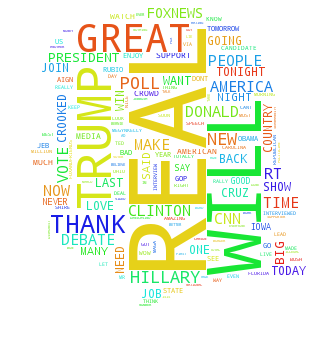

In [110]:
word_cloud = show_and_save_cloud(tweet_text, trump_shadow_mask, "white", base_path + "tweet_cloud.jpg")
word_cloud.to_image()


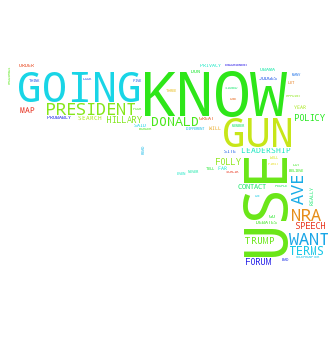

In [111]:
word_cloud = show_and_save_cloud(nra_speech_text, gun_mask, "white", base_path + "nra_speech_cloud.jpg")
word_cloud.to_image()

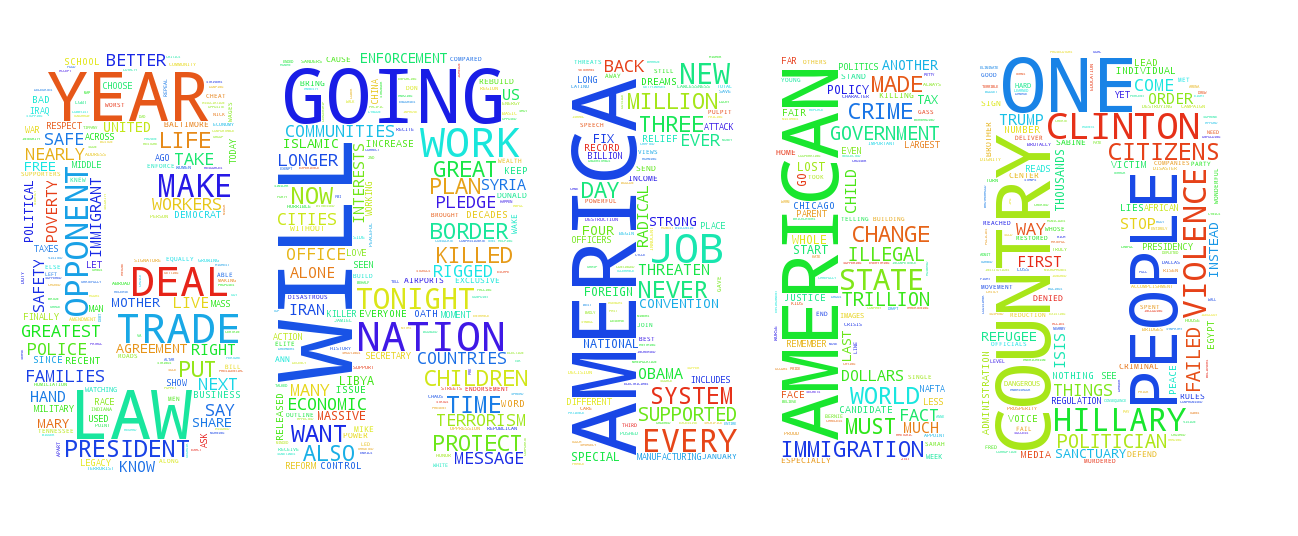

In [112]:
word_cloud = show_and_save_cloud(nomination_speech_text, greed_mask, "white", base_path + "nomination_speech_cloud.jpg")
word_cloud.to_image()